In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [2]:
df = pd.read_csv("C:/Users/Mabylly/Downloads/creditcard.csv")

VISUALIZAÇÃO DOS DADOS

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


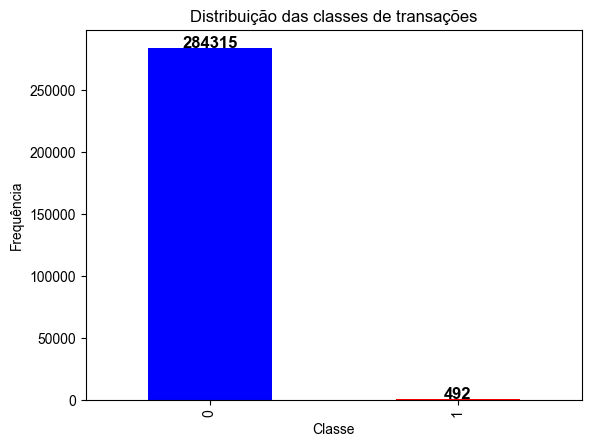

In [17]:
# Contar a quantidade de exemplos por classe
count_classes = df['Class'].value_counts()

# Criar o gráfico de barras
ax = count_classes.plot(kind='bar', title="Distribuição das classes de transações", color=['blue', 'red'])
plt.xlabel("Classe")
plt.ylabel("Frequência")

# Adicionar os valores acima das barras
for i, v in enumerate(count_classes):
    plt.text(i, v + 50, str(v), ha='center', fontsize=12, fontweight='bold')

# Mostrar o gráfico
plt.show()



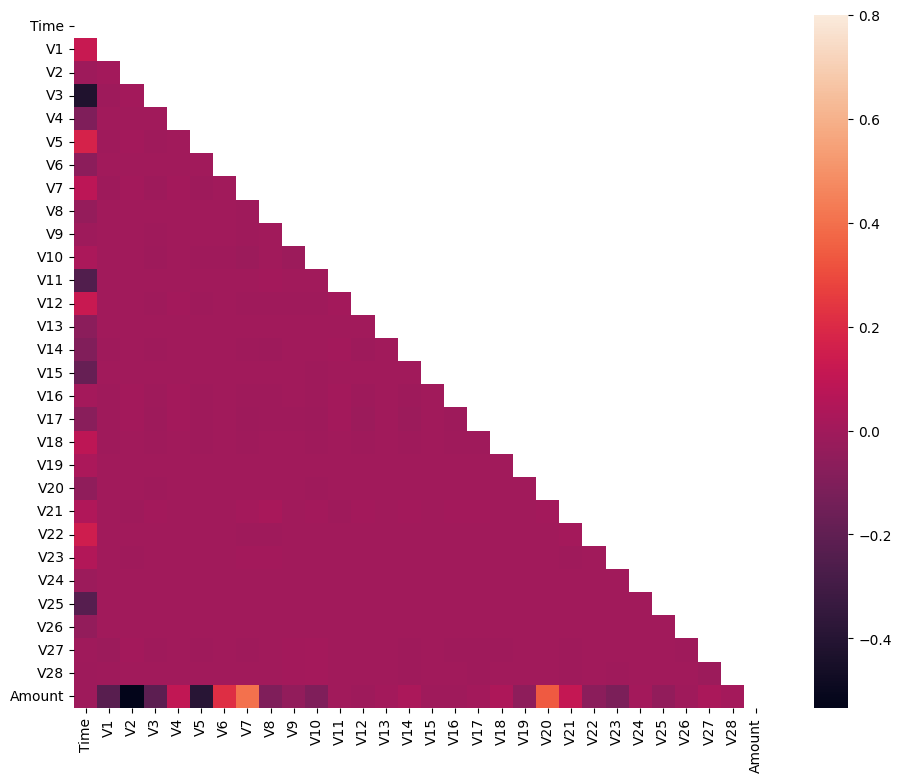

In [12]:
correlation = df.drop(columns="Class").corr() 

mask = np.triu(np.ones_like(correlation)) 

fig = plt.figure(figsize= (12,9))
sns.heatmap(correlation, vmax = .8, square = True, mask=mask)
plt.show()
##deixar triangular só 
#tambem ocultar a variavel classe da matriz 

In [13]:
# negativo: quando um aumenta o outro diminui
# positivo: quando um aumenta o outro tambem aumenta

In [14]:
#algoritimos pensados
# random forest junto com isolation forest
# xgbost

# logistic regresion
#só o logistic precisa escalonar as variaveis

# é bom lidar com o desbalanceamento das classes usando class_weight

PRÉ - PROCESSAMENTO

In [ ]:
print("\n Duplicidade:", df.duplicated().sum())

In [ ]:
df.drop_duplicates(inplace=True)
print("\n Duplicidade:", df.duplicated().sum())

In [15]:
#standardscaller 
scaler = StandardScaler()

# dataset escalonado
df_scaler = df 
df_scaler[['Time', 'Amount']] = scaler.fit_transform(df_scaler[['Time', 'Amount']])

In [16]:
df_scaler.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.837260e+05,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,2.837260e+05,283726.000000
mean,1.218105e-16,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,-5.409347e-17,0.001667
std,1.000002e+00,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,1.000002e+00,0.040796
min,-1.996823e+00,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,-3.533268e-01,0.000000
25%,-8.552128e-01,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,-3.309625e-01,0.000000
50%,-2.131081e-01,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,-2.654671e-01,0.000000
75%,9.369423e-01,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,-4.378088e-02,0.000000
max,1.642362e+00,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,1.022476e+02,1.000000


In [17]:
#Dataset Original
X = df.drop('Class', axis=1)
y = df['Class']

# Dividir em Treinamento (70%) e Test (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

In [18]:
#Fazer split para o dataset escalonado

In [19]:
# Treinar o modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, class_weight="balanced" ,random_state=42)
rf.fit(X_train, y_train)

# Fazer previsões
y_pred_rf = rf.predict(X_test)
y_scores_rf = rf.predict_proba(X_test)[:, 1]

# Avaliar o modelo
print("Relatório de Classificação - Random Forest")
print(classification_report(y_test, y_pred_rf))


Relatório de Classificação - Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.96      0.71      0.82       142

    accuracy                           1.00     85118
   macro avg       0.98      0.86      0.91     85118
weighted avg       1.00      1.00      1.00     85118



In [20]:
# Treinar Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
iso_forest.fit(X_train)

# Criar nova feature baseada nas previsões do Isolation Forest
X_train_if = np.c_[X_train, iso_forest.decision_function(X_train)]
X_test_if = np.c_[X_test, iso_forest.decision_function(X_test)]

# Treinar Random Forest com a nova feature e ajuste de pesos
rf = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)
rf.fit(X_train_if, y_train)

# Fazer previsões
y_pred_rf_if = rf.predict(X_test_if)
y_scores_rf_if = rf.predict_proba(X_test_if)[:, 1]


# Avaliar o modelo
print("Relatório de Classificação - Random Forest com Feature do Isolation Forest")
print(classification_report(y_test, y_pred_rf_if))


Relatório de Classificação - Random Forest com Feature do Isolation Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.96      0.73      0.83       142

    accuracy                           1.00     85118
   macro avg       0.98      0.86      0.91     85118
weighted avg       1.00      1.00      1.00     85118



In [23]:
# Dividir o dataset escalonado em Treinamento (70%) e Teste (30%)
X_scaler = df_scaler.drop('Class', axis=1)
y_scaler = df_scaler['Class']

X_train_scaler, X_test_scaler, y_train_scaler, y_test_scaler = train_test_split(
    X_scaler, y_scaler, test_size=0.3, stratify=y_scaler, random_state=42
)

# Treinar o modelo de Regressão Logística
logistic_model = LogisticRegression(class_weight="balanced", random_state=42)
logistic_model.fit(X_train_scaler, y_train_scaler)

# Fazer previsões
y_pred_logistic = logistic_model.predict(X_test_scaler)
y_scores_logistic = logistic_model.predict_proba(X_test_scaler)[:, 1]

# Avaliar o modelo
print("Relatório de Classificação - Regressão Logística")
print(classification_report(y_test_scaler, y_pred_logistic))

Relatório de Classificação - Regressão Logística
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     84976
           1       0.05      0.89      0.10       142

    accuracy                           0.97     85118
   macro avg       0.53      0.93      0.54     85118
weighted avg       1.00      0.97      0.98     85118



In [24]:
# Treinar o modelo XGBoost
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb_clf.fit(X_train, y_train)

# Fazer previsões
y_pred_xgb = xgb_clf.predict(X_test)
y_scores_xgb = xgb_clf.predict_proba(X_test)[:, 1]

# Avaliar o modelo
print("Relatório de Classificação - XGBoost")
print(classification_report(y_test, y_pred_xgb))

c:\Users\Mabylly\anaconda3\envs\fiftyone_env\lib\site-packages\xgboost\core.py:158: UserWarning: [15:44:31] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Relatório de Classificação - XGBoost
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.96      0.75      0.84       142

    accuracy                           1.00     85118
   macro avg       0.98      0.87      0.92     85118
weighted avg       1.00      1.00      1.00     85118



In [ ]:
#plotar as matrizes de confusão e ver qual qual modelo acerta mais na classe que tem menos
#extrair o aoc e depois traçar a curva roc

In [25]:
# Função para exibir matriz de confusão
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Fraudulenta', 'Fraudulenta'], yticklabels=['Não Fraudulenta', 'Fraudulenta'])
    plt.xlabel('Previsto')
    plt.ylabel('Real')
    plt.title(title)
    plt.show()

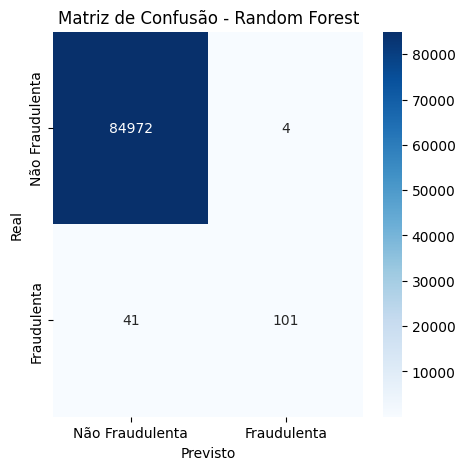

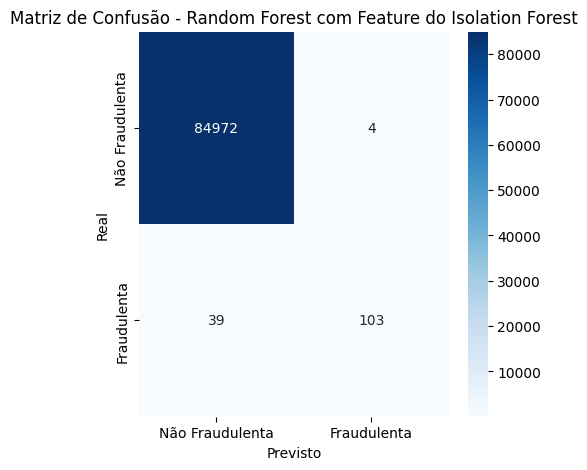

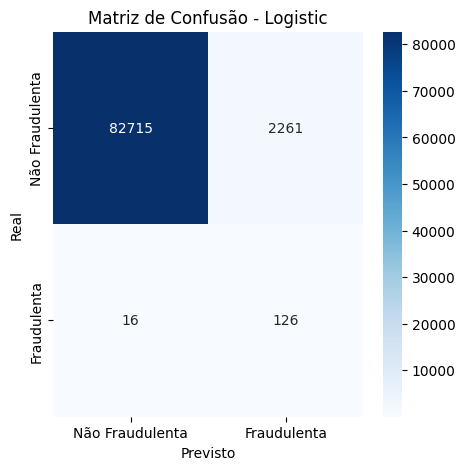

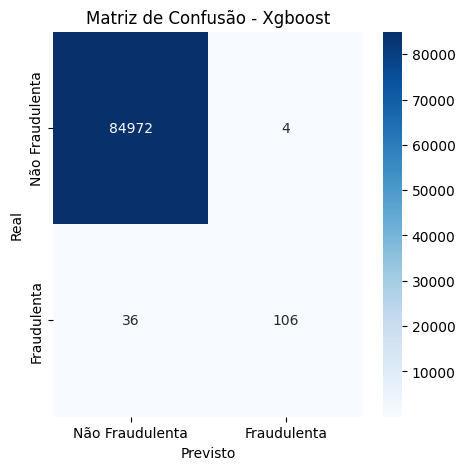

In [26]:
# Exibir matrizes de confusão
plot_confusion_matrix(y_test, y_pred_rf, "Matriz de Confusão - Random Forest")
plot_confusion_matrix(y_test, y_pred_rf_if, "Matriz de Confusão - Random Forest com Feature do Isolation Forest")
plot_confusion_matrix(y_test_scaler, y_pred_logistic, "Matriz de Confusão - Logistic")
plot_confusion_matrix(y_test, y_pred_xgb, "Matriz de Confusão - Xgboost")

In [27]:
# Função para exibir curva AUC-ROC
# Ver se tem algo errado
def plot_roc_curve(y_true, y_scores, label):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

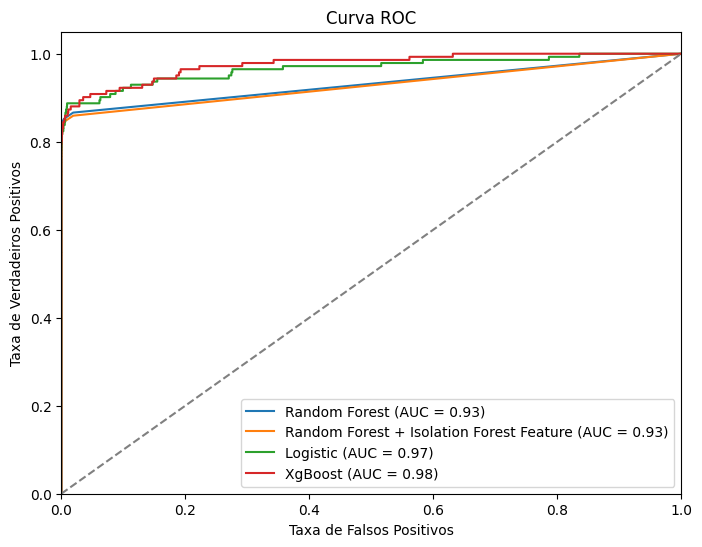

In [28]:
plt.figure(figsize=(8, 6))
plot_roc_curve(y_test, y_scores_rf, "Random Forest")
plot_roc_curve(y_test, y_scores_rf_if, "Random Forest + Isolation Forest Feature")
plot_roc_curve(y_test_scaler, y_scores_logistic, "Logistic")
plot_roc_curve(y_test, y_scores_xgb, "XgBoost")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Linha diagonal de referência
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()